In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [19]:
df=pd.read_csv(r'C:\Users\lamisa\Desktop\Recomender system\Electronics.csv',names=["user_id", "product_id", "ratings", "timestamp"])
df.head(10)

,user_id,product_id,ratings,timestamp
0,0060009810,A1N070NS9CJQ2I,5.0,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.0,1025913600
2,0060009810,A192HO2ICJ75VU,5.0,1025654400
3,0060009810,A2T278FKFL3BLT,4.0,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.0,1025222400
5,0060009810,A21JDG4HA6OLPF,4.0,1024963200
6,0060009810,A2NCADLQY962YD,5.0,1024704000
7,0060786817,A2UNA438B0FRA8,5.0,1138233600
8,0060786817,A2NQQSHSQKKGEX,5.0,1137801600
9,0060786817,A5EXND10WD4PM,3.0,1137542400


In [20]:
#drop timestamp column
df.drop(['timestamp'], axis=1,inplace=True)

print(df.shape)

#check for missing values
df.isna().sum()

(20994353, 3)


user_id       0
product_id    0
ratings       0
dtype: int64

In [21]:
df=df.iloc[:1048576,0:]
df.shape

(1048576, 3)

In [22]:
# number of unique users
print("number of unique users: "+str(len(df.user_id.unique())))
#number of unique products
print("number of unique products: "+str(len(df.product_id.unique())))

number of unique users: 12759
number of unique products: 824624


In [23]:
#no of ratings per product
products=df.product_id.value_counts()
print(products[:5])

A5JLAU2ARJ0BO     241
A231WM2Z2JL0U3    172
A6FIAB28IS79       88
AT6CZDCP4TRGA      79
A3OXHLG6DIBRW8     63
Name: product_id, dtype: int64


In [24]:
#no of ratings per users
customers=df.user_id.value_counts()
print(customers[:5])

B000BQ7GW8    13768
B0006BB9MG     7593
B000A6PPOK     6398
B00004ZCJJ     5697
B00004ZCJI     5697
Name: user_id, dtype: int64


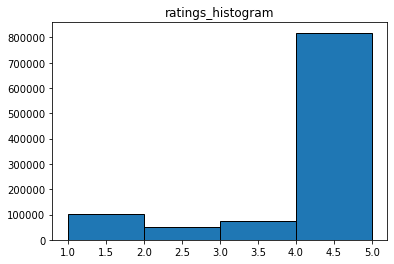

In [25]:
#explore train data:
plt.hist(df.ratings, bins = [1,2,3,4,5],ec='black') 
plt.title("ratings_histogram") 
plt.show()

In [ ]:
#try content based recomendation here (incomplete)
product_df=pd.DataFrame(ratings_df.groupby('product_id')['ratings'].mean())
product_df['rating_counts']=ratings_df.groupby('product_id')['ratings'].count()
product_df.sort_values(by=['rating_counts','ratings'],ascending=False)[:10]

In [70]:
#filter out products with less than 50 reviews
ratings_df=df.groupby('product_id').filter(lambda x: x['ratings'].count()>5)

In [71]:
## item_based colleaborative filtering
##memory based filtering system
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[["user_id", "product_id", "ratings"]], reader)

In [72]:
#split data
train_data, test_data = train_test_split(data, test_size=0.3,random_state=10)

In [73]:
# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [74]:
algo.fit(train_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [75]:
predictions=algo.test(test_data)

In [76]:
accuracy.rmse(predictions)

RMSE: 1.0947


1.094728561487568

In [77]:
#tuning hyper parameters
similarity_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}
param_grid = {"sim_options": similarity_options}
grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
grid_search.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [78]:
print(grid_search.best_score["rmse"])
print(grid_search.best_params["rmse"])

1.0585616007615926
{'sim_options': {'name': 'msd', 'min_support': 4, 'user_based': False}}


In [81]:
#model based approach
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

In [82]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

1.0187792547255357
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
